# after the join phase is the update phase where i will update the diffrent in time 

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno

In [2]:
df =pd.read_csv('../data/AQAR_TEST.csv')

# IN THIS FILE   WILL CREATE A FEATURE THAT CALCULATE HOW LONG DID THE APARTMENT STAYED ON MARKET

In [3]:
df['DayOfRent'].value_counts()

1    3538
0    3330
Name: DayOfRent, dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'user_id', 'id', 'title', 'price', 'content', 'imgs',
       'refresh', 'beds', 'livings', 'wc', 'area', 'street_width', 'age',
       'last_update', 'ketchen', 'ac', 'furnished', 'location', 'path', 'user',
       'district', 'width', 'length', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'UserName', 'iam_verified', 'rega_id',
       'DayOfRent'],
      dtype='object')

In [5]:
# df.drop(['timeBeforeRent' ], axis = 1 , inplace=True) #this will drop the DayOfRentdate 

### create column that called timeBeforeRent

In [7]:
df['timeBeforeRent'] = 0 

# depending on the DayOfRent it will subtract the date on where it was rented minus the creation date 

In [8]:
i = 8 
f =14
for index, row in df.iterrows():

    if row["DayOfRent"] == 1:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/07', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 2:
        df['timeBeforeRent'][index] =(pd.to_datetime('2022/08/08', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 3:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/09', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 4:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/10', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 5:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/11', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 6:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/12', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 7:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/13', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == 8:
        df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/14', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+1:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+1}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+2:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+2}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+3:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+3}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+4:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+4}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+5:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+5}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+6:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+6}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
    elif row["DayOfRent"] == i+7:
        df['timeBeforeRent'][index] = (pd.to_datetime(f'2022/08/{f+7}', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')
        
    

/tmp/ipykernel_20746/3053309950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timeBeforeRent'][index] = (pd.to_datetime('2022/08/07', format='%Y-%m-%d') - pd.to_datetime(df['create_time'][index][2:12], format='%Y-%m-%d'))/np.timedelta64(1, 'D')


shows the distribution of the the time it took till it got rented 

<AxesSubplot:>

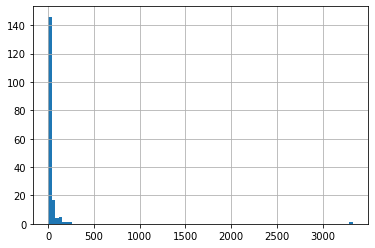

In [13]:
df['timeBeforeRent'].value_counts().hist(bins = 90)

In [16]:
df['timeBeforeRent'].mean()

14.701271813073056

In [18]:
df['timeBeforeRent'].describe()

count    6762.000000
mean       14.701272
std        32.186597
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max      1199.000000
Name: timeBeforeRent, dtype: float64

ZERO indicate thant it is not rented 

after exclude it the describe as shown 

In [17]:
df.loc[(df['timeBeforeRent']!=0) ]['timeBeforeRent'].describe() #DayOfRentones only 


count    3009.000000
mean       33.037554
std        41.503616
min         1.000000
25%        12.000000
50%        21.000000
75%        42.000000
max      1199.000000
Name: timeBeforeRent, dtype: float64

# TO CALCULATE HOW LONG DOES APARTMENT ON MARKET (and still is ) i createed a feature called onMarket

In [14]:
df.to_csv('../data/AQAR_TEST.csv' , index=False)